In [1]:
import scipy
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

src_dir = os.path.join(os.getcwd(), "../src")
sys.path.append(src_dir)
from course_project.dynamics import *
from course_project.constants import *

## Torque Tracking Experiment

params['b'] 7.8251716
params['J'] 0.039125858
params['k_s'] 1390.16426513
100


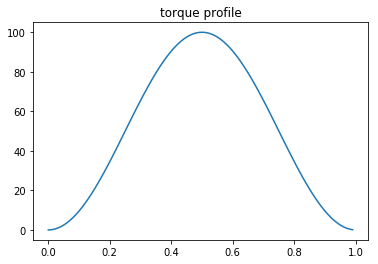

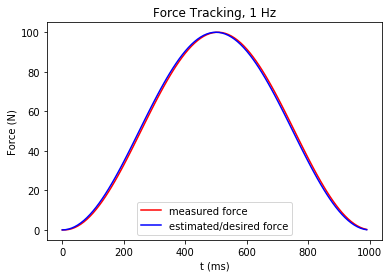

In [9]:
def run_torque_experiment(freq_hz, k_s=None, save=True):
    params = make_default_params()
    
    print "params['b']", params['b']
    print "params['J']", params['J']
    print "params['k_s']", params['k_s'] 
    
    if k_s is not None:
        params['k_s'] = k_s
        
    k_s = params['k_s']
    
    dt = 0.01/freq_hz
    T_max_force = 1.0/(2*freq_hz)
    max_force = 100.0
    t_vec = np.arange(0,2*T_max_force, dt)
    N = t_vec.size
    omega_vec = 2 * t_vec * np.pi * freq_hz
    amplitude = 0.1  
    x_b = amplitude/2.0 * (1 - np.cos(omega_vec))
    x_b_dot = amplitude/2.0 * np.sin(omega_vec)


    def torque_function(t):
        """
        Return the desired torque value
        """
#         if t <= T_max_force:
#             return max_force*(t)/T_max_force
#         else:
#             return max_force*(2*T_max_force - t)/T_max_force        
        force = max_force/2.0 * (1 - np.cos(2 * np.pi * freq_hz * t))
        return force
        



    torque_function_vectorize = np.vectorize(torque_function)
    print t_vec.size
    torque_vec = torque_function_vectorize(t_vec)

    # plot torque profile
    plt.plot(t_vec, torque_vec)
    plt.title("torque profile")
    plt.show()

    # simulate the system
    # construct the system
    sys, [A,B,C,D] = linear_system_ss_from_params(params)

    # simulate the system while keeping the leg stationary in the fixture
    input_tape = np.zeros([N,2])
    input_tape[:, 0] = torque_vec

    # simulate the system
    t_out, yout, xout = scipy.signal.lsim(sys, input_tape, t_vec)

    # plot the output force
    plt.plot(1e3*t_vec, yout, 'r', label='measured force')
    plt.plot(1e3*t_vec, torque_vec, 'b', label='estimated/desired force')
    plt.title("Force Tracking, %d Hz" %(freq_hz))
    plt.xlabel('t (ms)')
    plt.ylabel('Force (N)')
    plt.legend()
    if save:
        plt.savefig(os.path.join(SAVE_DIR,  "force_tracking_%d.pdf" %(freq_hz)))
    plt.show()
    
    
    d = dict()
    d['t_vec'] = t_vec
    d['params'] = params
    d['yout'] = yout
    d['force_vec'] = torque_vec
    d['k_s'] = k_s
    return d

d = run_torque_experiment(1, save=False)

params['b'] 7.8251716
params['J'] 0.039125858
params['k_s'] 1390.16426513
100


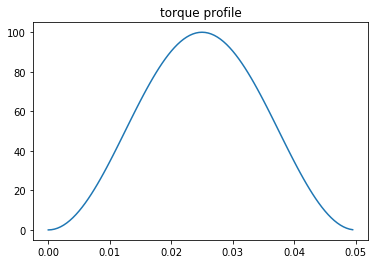

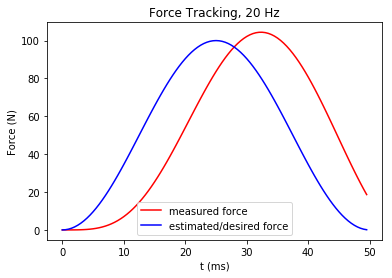

params['b'] 7.8251716
params['J'] 0.039125858
params['k_s'] 1390.16426513
100


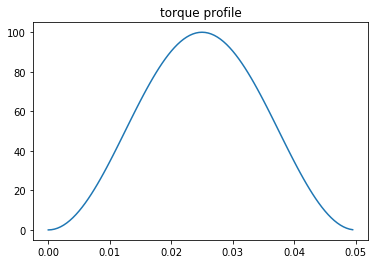

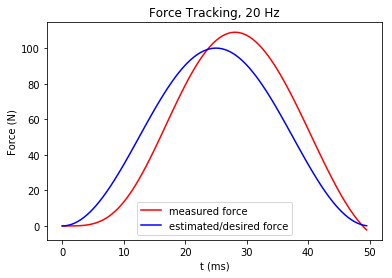

params['b'] 7.8251716
params['J'] 0.039125858
params['k_s'] 1390.16426513
100


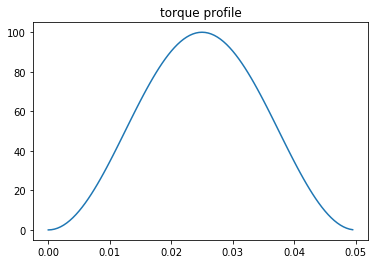

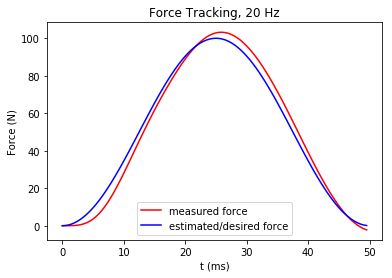

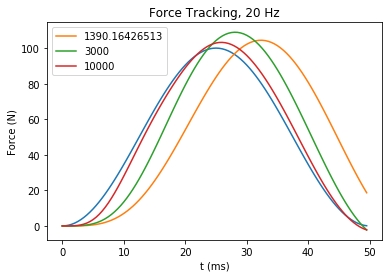

In [7]:
freq_hz = 20
results = []
d = run_torque_experiment(freq_hz, save=False)
results.append(d)

d_2 = run_torque_experiment(freq_hz, save=False, k_s=3000)
results.append(d_2)

d_3 = run_torque_experiment(freq_hz, save=False, k_s=10000)
results.append(d_3)

# d_4 = run_torque_experiment(freq_hz, save=False, k_s=1e6)
# results.append(d_4)

t_vec = d['t_vec']
plt.plot(1e3*t_vec, d['force_vec'])
for data in results:
    plt.plot(1e3*t_vec, data['yout'], label=data['k_s'])


plt.xlabel('t (ms)')
plt.ylabel('Force (N)')
plt.title("Force Tracking, %d Hz" %(freq_hz))
plt.legend()
plt.savefig(os.path.join(SAVE_DIR, "force_tracking_comparison.pdf"))
plt.show()

